# **Sesi 16: <font color='darkred'>Model Klasifikasi Sederhana**</font>

In this practice you will learn:
* Training Machine Learning Model
* Evaluating perfomance mode of Machine Learning

### <font color='darkred'>A. Library Used</font>

* `pandas` adalah library open source yang ada pada bahasa pemrograman Python yang sering digunakan untuk memproses data, mulai pembersihan data, manipulasi data, hingga melakukan analisis data.
* `NumPy` merupakan salah satu library Python yang berfungsi untuk proses komputasi numerik.
* `seaborn` adalah library untuk membuat grafik dan statistik dengan menggunakan Python. Library ini dibangun berdasarkan library Matplotlib yang sudah ada.
* `sklearn` adalah library yang dibangun berdasarkan NumPy, SciPy, dan Matplotlib. Fungsi dari module ini adalah untuk membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine learning atau data science.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing dataset
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import plot_tree
from sklearn.utils import resample

#importing Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


#importing performance matrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### <font color='darkred'>B. Dataset</font>

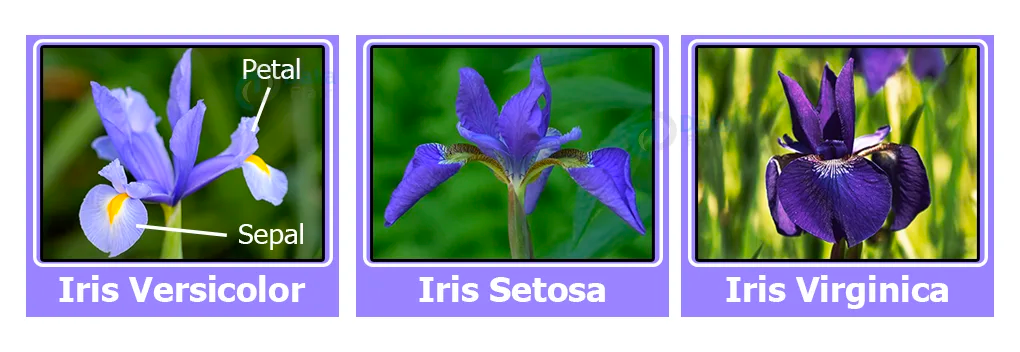Data yang digunakan adalah Iris dengan data deskripsi sebagai berikut:

* **sepal length (cm)**: Panjang Sepal bunga dalam satuan centimeter  
* **sepal width (cm)**: Lebar Sepal bunga dalam satuan centimeter
* **petal length (cm)**: Panjang Kelopak bunga dalam satuan centimeter  
* **petal width (cm)**: Lebar Kelopak bunga dalam satuan centimeter
* **target**: Jenis bunga iris yang sudah dikodefisikasikan (Setosa, Versicolor, Virginica)

- 0 -> SETOSA
- 1 -> Versicolor
- 2 -> Virginica

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'],iris['target']], columns=iris['feature_names']+['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### <font color='darkred'>C. Exploratory Data Analysis (EDA)</font>

<Axes: xlabel='target'>

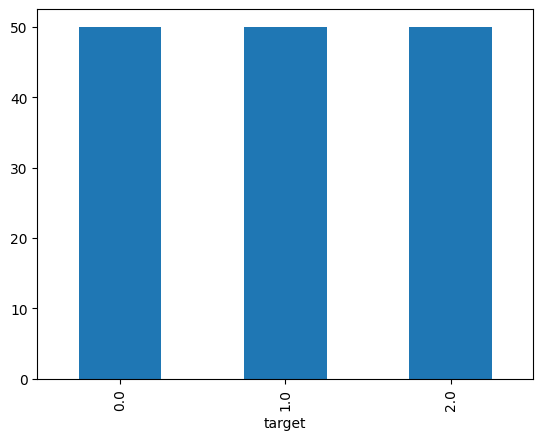

In [ ]:
jml_category = iris_df.target.value_counts()
jml_category.plot(kind='bar')

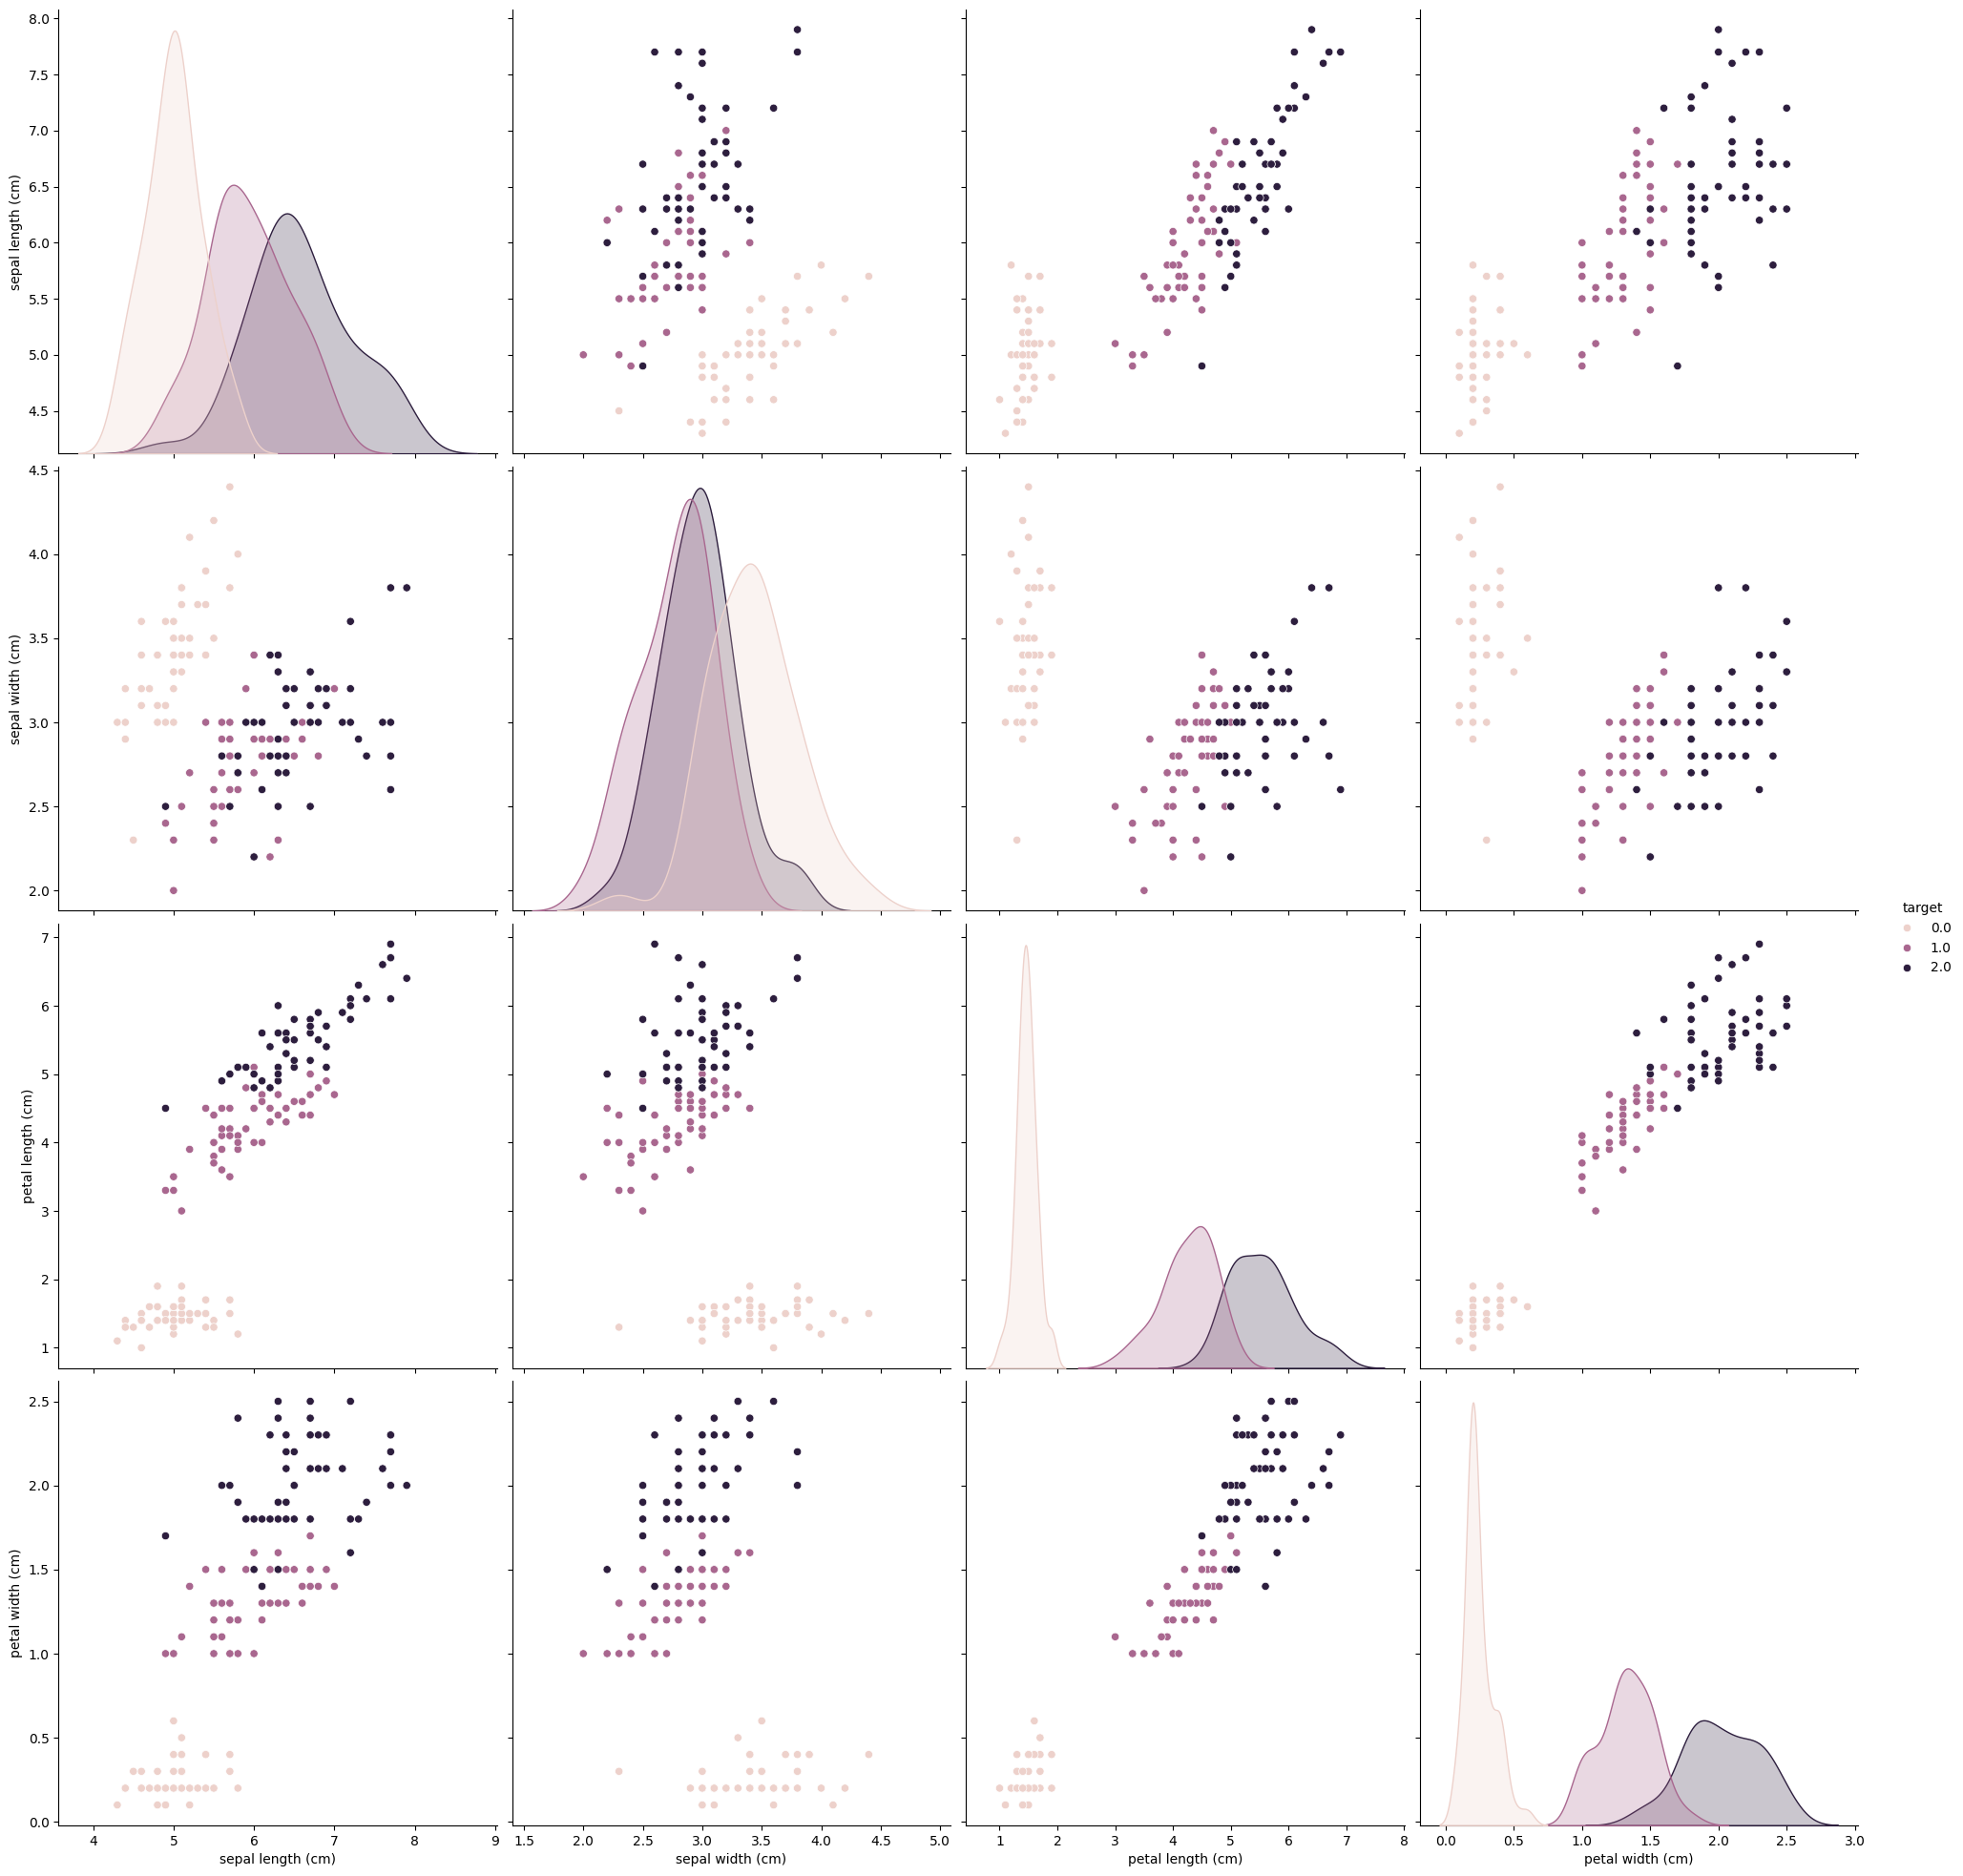

In [ ]:
sns.pairplot(iris_df, hue="target", height=5)


<details><summary>Click here for the INSIGHTS</summary>

* Pairplot berguna untuk melihat dominasi dari suatu katergori/kelas terhadaps setiap parameter numerik yang ada.
* Petal Length dan Petal width adalah fitur yang paling berguna untuk mengidentifikasi berbagai jenis bunga.
* Meskipun Setosa dapat dengan mudah diidentifikasi (dapat dipisahkan secara linier), Virnica dan Versicolor memiliki beberapa tumpang tindih.

</details>

### <font color='darkred'>D. Data Preprocessing</font>

#### <font color='darkblue'>D.1 Pemisahan Features (X) dan Target (Y)</font>

In [ ]:
X = iris_df.drop(["target"], axis=1)
y = iris_df["target"]

print(X.shape, y.shape)

(150, 4) (150,)


#### <font color='darkblue'>D.2 Scaling Nilai Features (X)</font>

**Standarisasi**, adalah tehnik lain dalam melakukan perubahan skala, dimana data yang dimiliki akan diubah sehingga memiliki rata rata = 0 (terpusat) dan standar deviasi = 1.

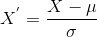


Standarisasi sangat membantu ketika data tersebut tidak terdistribusi normal secara gaussian.

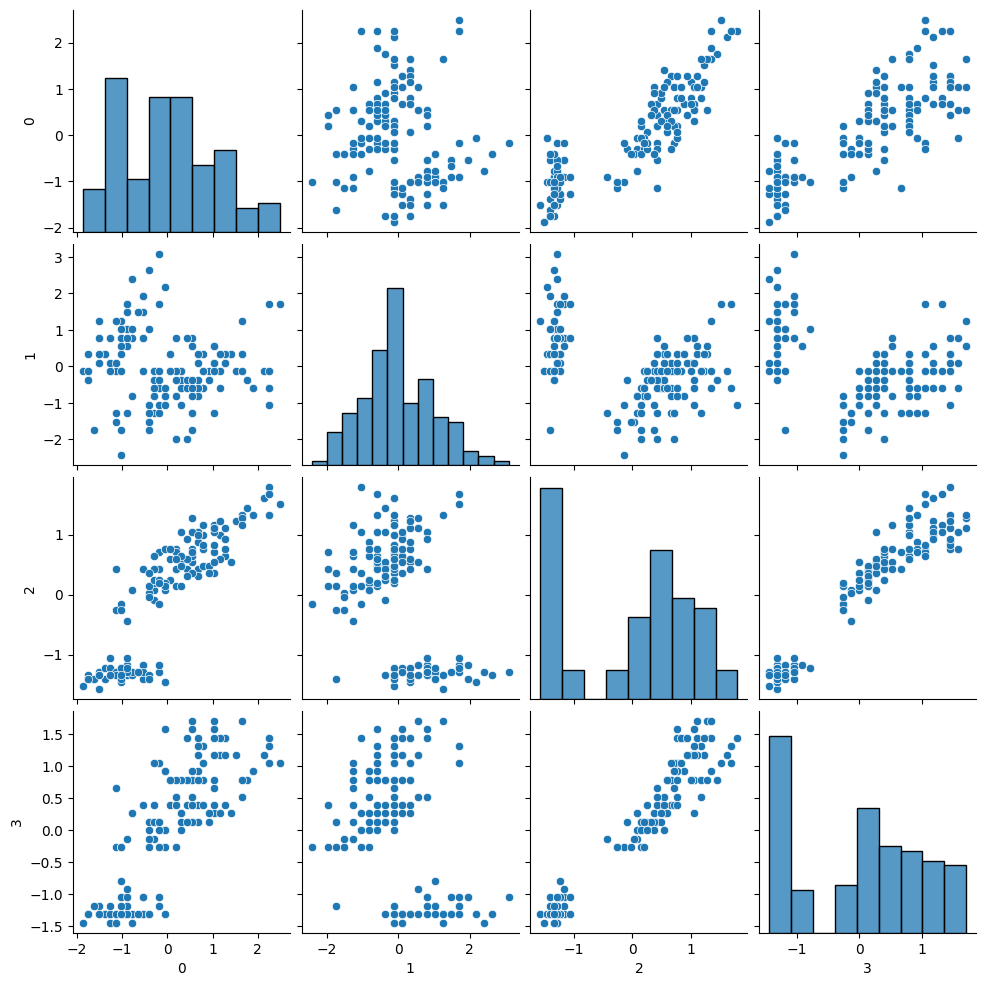

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
sns.pairplot(pd.DataFrame(X))

### <font color='darkred'>E. Model Development</font>

#### <font color='darkblue'>E.1 Fitting Model</font>

Proses fit model adalah proses yang dijalankan untuk menjalankan proses pembelajaran algoritma model kita terhadap data latih


##### <font color='darkblue'>E.1.1 KNearest Neighbours</font>

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

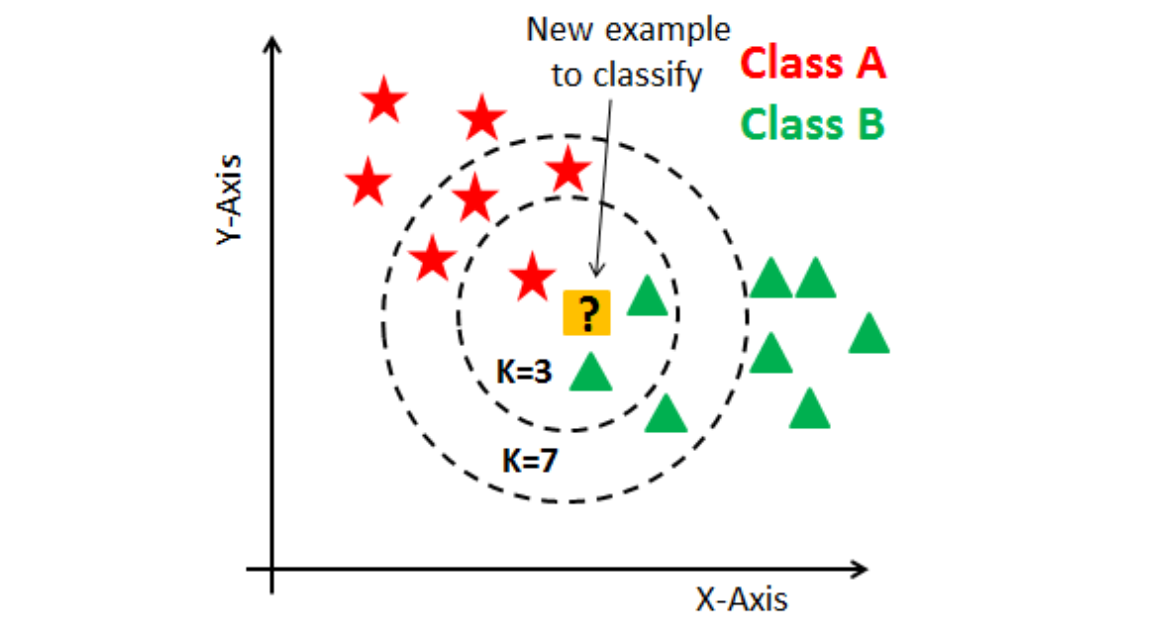

KNN perlu menentukan nilai dari parameter K (jumlah dari tetangga terdekat)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

##### <font color='darkblue'>E.1.2 Logistic Regression</font>

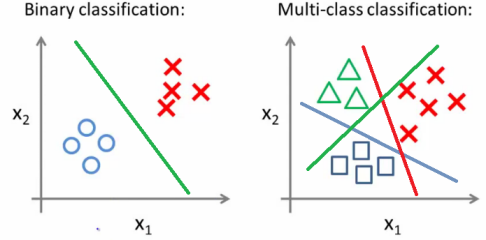

Logistic regression is designed for two-class problems, modeling the target using a binomial probability distribution function. The class labels are mapped to 1 for the positive class or outcome and 0 for the negative class or outcome. The fit model predicts the probability that an example belongs to class 1.

By default, logistic regression cannot be used for classification tasks that have more than two class labels, so-called multi-class classification.
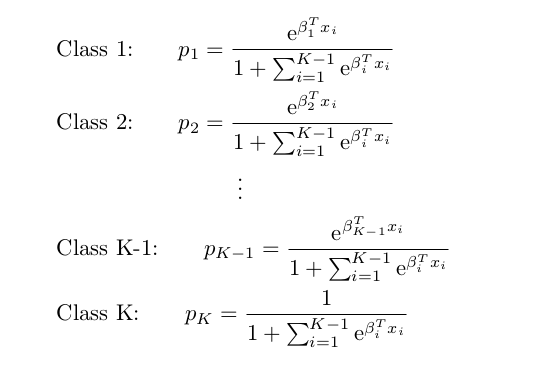

In [ ]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [ ]:
print("Nilai koef model", lr.coef_)
print("Nilai intercept model", lr.intercept_)

Nilai koef model [[-1.07659238  1.15977648 -1.92814138 -1.81227307]
 [ 0.5899243  -0.36263595 -0.36461312 -0.82700241]
 [ 0.48666809 -0.79714052  2.2927545   2.63927548]]
Nilai intercept model [-0.20463897  2.07455834 -1.86991938]


##### <font color='darkblue'>E.1.3 Decision Tree</font>

A decision tree is a machine learning technique that can be used for binary classification or multi-class classification. A multi-class classification problem is one where the goal is to predict the value of a variable where there are three or more discrete possibilities.


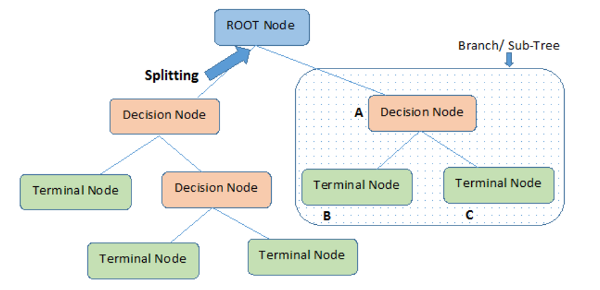



*   Root Nodes – It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features
*   Decision Nodes – the nodes we get after splitting the root nodes are called Decision Node
*   Leaf Nodes – the nodes where further splitting is not possible are called leaf nodes or terminal nodes
*   Sub-tree – just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.
*   Pruning – is nothing but cutting down some nodes to stop overfitting.

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

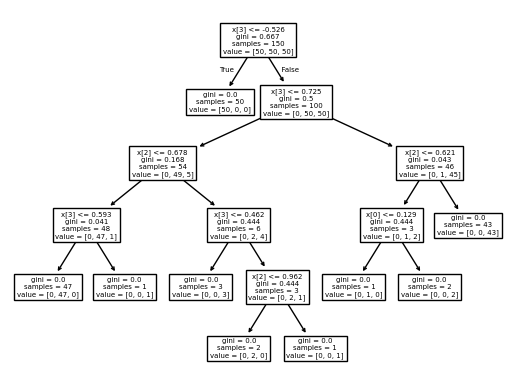

In [ ]:
plot_tree(dt)
plt.show()

### <font color='darkred'>F. Model Evaluation</font>

#### <font color='darkblue'>F.1 Confusion Matrix</font>

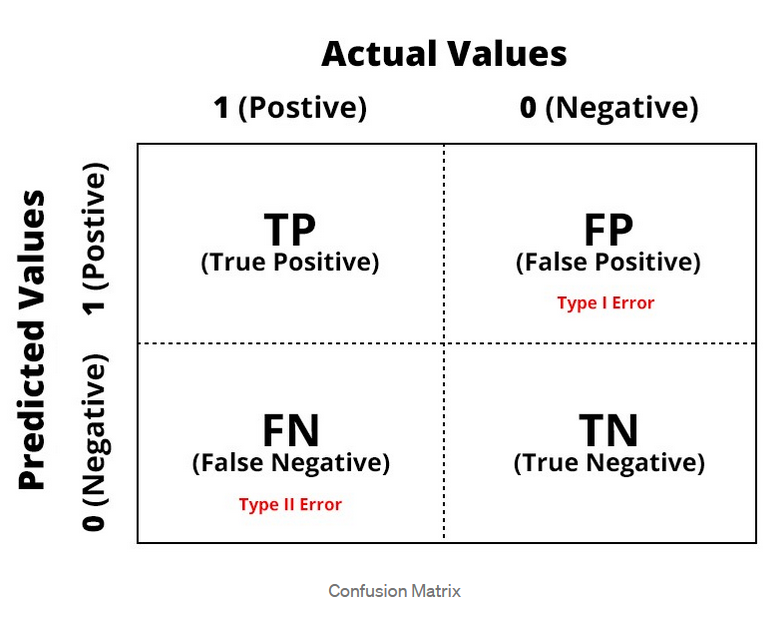


*   Accuracy = (TP+TN) / (TP+FP+FN+TN)
: menggambarkan seberapa akurat model dalam mengklasifikasikan dengan benar
*   Precision = (TP) / (TP + FP)
: menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
*   Recall  = TP / (TP + FN)
: menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi
*   F-1 Score  = (2 * Recall * Precision) / (Recall + Precision)
: menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan
*   Support  = jumlah kemunculan aktual dari kelas dari sebuah dataset

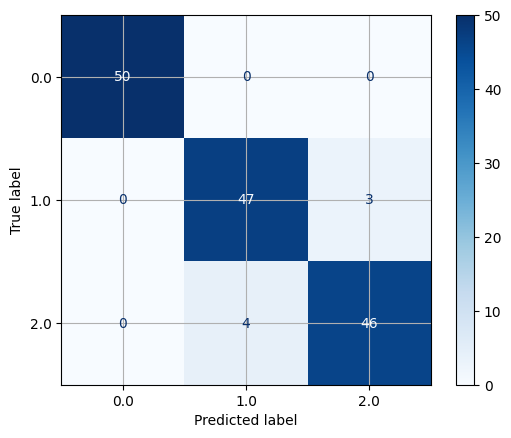

In [ ]:
# menggunakan model KNN sebelumnya untuk memprediksi
predict = knn.predict(X)

cm_test = confusion_matrix(y, predict, labels=knn.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=knn.classes_)
disp_test.plot(cmap='Blues').ax_.grid()

In [ ]:
#Classification Report
print(classification_report(y, predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.92      0.94      0.93        50
         2.0       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



- Accuracy Score lebih tepat digunakan untuk data yang cenderung "balance". Keuntungan tambahan adalah memudahkan penjelasan kepada stakeholder mengenai performa model. Accuracy score juga dapat digunakan ketika data feature dianggap penting semua.
- F1-score dapat digunakan pada permodelan klasifikasi biner (binary classification) dan ketika dataset yang digunakan cenderung imbalance.

#### <font color='darkblue'>F.2 Hold Out Method (Data Validation)</font>
proses validasi dengan metode hold out

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify= y , random_state = 42)
print('Jumlah Data train: X', X_train.shape, 'Y', y_train.shape)
print('Jumlah Data test: X', X_test.shape, 'Y', y_test.shape)

Jumlah Data train: X (105, 4) Y (105,)
Jumlah Data test: X (45, 4) Y (45,)


##### <font color='darkblue'>F.2.1 KNN (K-Nearest Neighbors)</font>

In [ ]:
# Proses training model


# evaluasi performa model pada data training


Performa Training: 0.9809523809523809


In [ ]:
# evaluasi performa model pada data testing


Performa Testing: 0.9111111111111111


##### <font color='darkblue'>F.2.2 Multi Algorithm (Logistic Regression, Decision Tree & KNN)</font>

Accuracy LR Training :  0.9809523809523809
Accuracy LR Testing :  0.9111111111111111
Accuracy DT Training :  1.0
Accuracy DT Testing :  0.9777777777777777
Accuracy KNN Training :  0.9809523809523809
Accuracy KNN Testing :  0.9111111111111111


#### <font color='darkblue'>F.3 Random Sub-Sampling</font>
proses validasi dengan metode Random Sub-Sampling Validation

#### <font color='darkblue'>F.3 K-Fold Cross Validation</font>
proses validasi dengan metode K-Fold Cross Validation

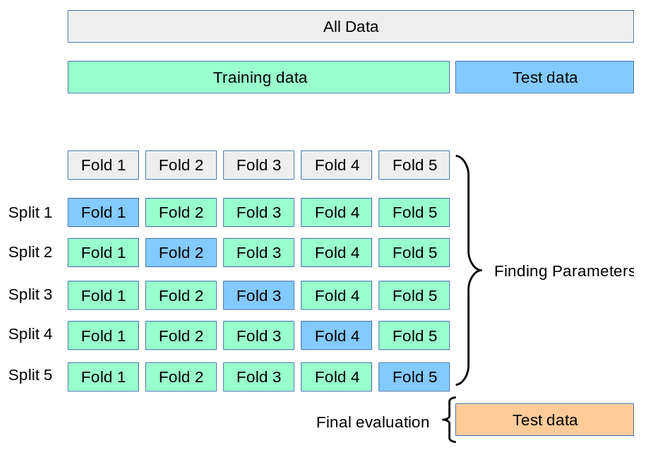

KFold cross validation akan membagi train dataset dan test dataset menjadi beberapa sample group (biasa disebut fold) dengan ukuran proporsi data yang sama lalu dilakukan iterasi untuk mentrain model dan menilai performa model hasil training. Setiap iterasi training, digunakan dataset train dan validasi yang berbeda sehingga memberikan indikasi yang lebih baik atas kemampuan model dalam bekerja pada data yang baru.

Jika dibandingkan dengan metode hold out yang bergantung pada satu kali split, indikasi performa model dengan KFold dapat lebih dipercaya karena Kfold tidak tergantung pada bagaimana data training displit menjadi data train dan data validasi. Namun, Kfold memerlukan lebih banyak computational power and time untuk dilakukan karena harus melatih model beberapa kali, dibandingkan dengan metode holdout.

Accuracy K-Fold :  0.9523809523809523 STD: 0.08518354199999201


### <font color='darkred'>G. Quiz</font>

Silahkan coba beberapa algoritma klasifikasi lain, bandingkan performa modelnya. Mana algortima yang menghasilkan model yang paling tinggi performa (akurasi) nya

algoritma yang dapat dicoba:
- LogisticRegression
- RadiusNeighborsClassifier
- GaussianNB
- SVC
- QuadraticDiscriminantAnalysis
- RandomForestClassifier
- AdaBoostClassifier
- ExtraTreesClassifier
- BaggingClassifier
- GradientBoostingClassifier

In [ ]:
models = {'LR': LogisticRegression(),
          'RNN': RadiusNeighborsClassifier(),
          'NB': GaussianNB(),
          'SVC': SVC(),
          'QDA': QuadraticDiscriminantAnalysis(),
          'ADA': AdaBoostClassifier(),
          'ExT': ExtraTreesClassifier(),
          'Bag': BaggingClassifier(),
          'GBC' :GradientBoostingClassifier()}

### <font color='darkred'>H. Documentation</font>

For more information:
* Pandas [Documentation](https://pandas.pydata.org/)
* Seaborn [Documentation](https://seaborn.pydata.org/)
* Sklearn [K-Nearest Neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* Sklearn [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* Sklearn [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)
* Sklearn [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Sklearn [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* Sklearn [Train Test Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Sklearn [Train Test Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


### <font color='darkred'>I. FAQ</font>

#### 1. Apakah harus menggunakan Google Collab saja ?
* Tidak, bisa menggunakan semua jenis platform yang bisa bahasa python, seperti anaconda, virtual studio code, dsb.

#### 2. Notebook pada Google Collab tidak bisa dijalankan ?
* Lakukan copy file notebook ke dalam drive masing-masing dengan cara save a copy in drive terlebih dahulu


#### 3. Data & Proses analisa hilang ketika dibuka kembali (google collab) tiba-tiba hilang ?
* Memang kekurangannya google collab seperti itu, maka solusinya harus di run kembali dari awal